# 1. Problem: To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# 2. Data: It contain two labels Hours and Scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#st_score =student score
data = "http://bit.ly/w-data"
st_score = pd.read_csv(data)
st_score.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# check for missing datas
st_score.isna().sum()

Hours     0
Scores    0
dtype: int64

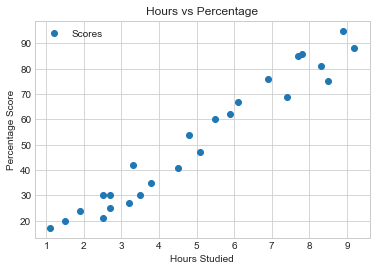

In [34]:
# let's visualize the data using plot
plt.style.use('seaborn-whitegrid')
st_score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Prediction

In [7]:
x = st_score[["Hours"]]
y = st_score["Scores"]

In [9]:
x[:10]

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [10]:
y[:10]

0    21
1    47
2    27
3    75
4    30
5    20
6    88
7    60
8    81
9    25
Name: Scores, dtype: int64

# Trainig/Test

In [11]:
#import package for train_test_split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train[:10]

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [20]:
x_test[:5]

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [21]:
y_train[:10]

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
Name: Scores, dtype: int64

In [22]:
y_test[:5]

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

# Model

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Visualize x and y

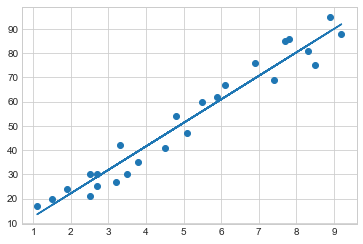

In [24]:
line = model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

# Predict

In [25]:
y_pred = model.predict(x_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [26]:
df = pd.DataFrame({"Actual" : y_test , "Predicted" : y_pred})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


# Test

In [30]:
hours = 8.45
test_pred = model.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score value=",test_pred[0])

No of Hours = 8.45
Predicted Score value= 84.64045275905036


In [31]:
hours = 9.25
test_pred = model.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score value=",test_pred[0])

No of Hours = 9.25
Predicted Score value= 92.38611528261494


# Evaluating 

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
